# Practical Work 5

## Students
- Flavia Pittet
- Fabio Vitali


In [1]:
## Ex1 - Gradient descent using matrix calculation

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def hypothesis(theta,X):  #theta = 1xD, X = DxN, output 1xN
    return np.dot(theta,X)

def gradientDescent(X,y,learning_rate,num_epoch,verbose=False):
    N = X.shape[0]      # number of sample
    D = X.shape[1]      # number of dimensions
    theta = np.ones(D)  # init thetas to some values
    X_trans = X.transpose() # X_trans is DxN
    
    for i in range(0,num_epoch):
        h = hypothesis(theta,X_trans)  #N dimension
        loss = h-y                     #N dimension
        gradient = X_trans.dot(loss) * (1.0/N)  
        theta = theta - learning_rate * (1.0/N) * gradient
    return theta

### a) Analyse the code above. It relies on matrix calculation. What type of gradient descent
does it implement ? Are you confident it is a correct implementation?

It's a standard gradient descent. We don't see any problem with this implementation


In [3]:
dataset = pd.read_excel('lausanne-appart.xlsx')
living_area = dataset['Living area (m2)'].values
nb_rooms = dataset['#rooms'].values
y =  dataset['rent (CHF)'].values

X = np.ones((len(dataset), 3))
X.T[1] = living_area
X.T[2] = nb_rooms

Thetas are  [25.14478068 28.33103005  2.30610609]


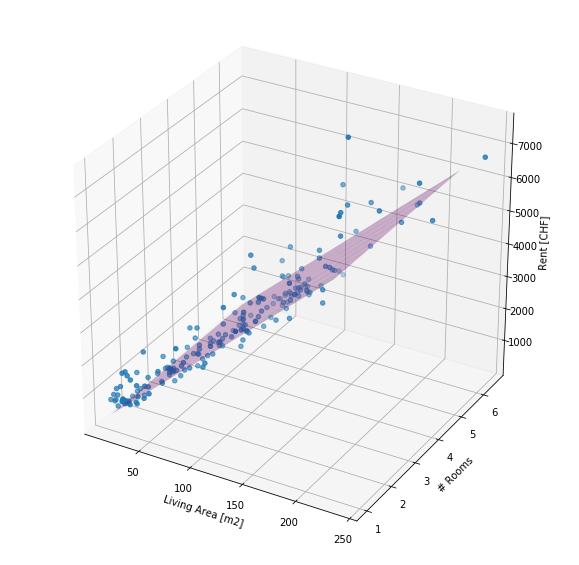

In [4]:
theta = gradientDescent(X, y, 0.0005, 200000)
print("Thetas are ", theta)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("Living Area [m2]")
ax.set_ylabel("# Rooms")
ax.set_zlabel("Rent [CHF]")
ax.scatter(living_area, nb_rooms, y)

xVal, yVal = np.meshgrid(np.arange(living_area.min(),
                                   living_area.max(),
                                  (living_area.max()-living_area.min())/15.)[:15],
                         np.arange(nb_rooms.min(),
                                   nb_rooms.max(),
                                  (nb_rooms.max()-nb_rooms.min())/15.)[:15])

h = theta[0] + xVal*theta[1] + yVal*theta[2]

ax.plot_surface(xVal, yVal, h, color='purple', alpha=0.3)

### c) Implement the zero-norm normalisation and apply it to the number of rooms and living area.

Thetas are  [932.7822275  368.37078678 307.48839699]


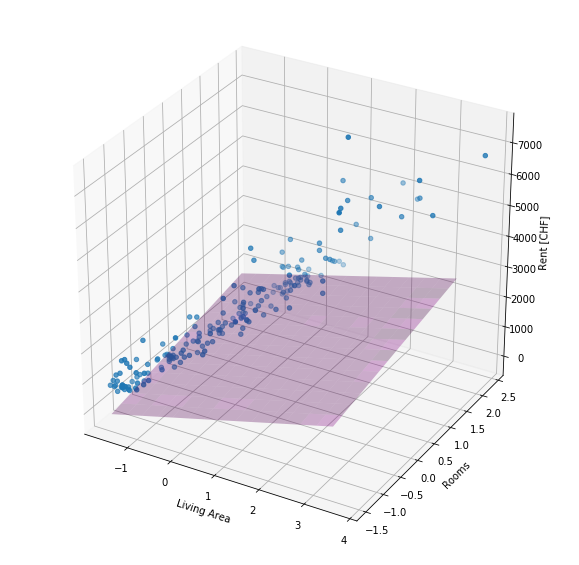

In [5]:
areaAvg = living_area.mean()
areaStd = living_area.std()

roomsAvg = nb_rooms.mean()
roomsStd = nb_rooms.std()

#Compute the new zero-norm values
norm_area = (living_area - areaAvg)/areaStd
norm_rooms = (nb_rooms - roomsAvg)/roomsStd

norm_X = np.ones((len(dataset), 3))
norm_X.T[1] = norm_area
norm_X.T[2] = norm_rooms

theta = gradientDescent(norm_X, y, 0.0005, 200000)
print("Thetas are ", theta)

xVal, yVal = np.meshgrid(np.arange(norm_area.min(),
                                   norm_area.max(),
                                  (norm_area.max()-norm_area.min())/15.)[:15],
                         np.arange(norm_rooms.min(),
                                   norm_rooms.max(),
                                  (norm_rooms.max()-norm_rooms.min())/15.)[:15])

h = theta[0] + xVal*theta[1] + yVal*theta[2]

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("Living Area")
ax.set_ylabel("Rooms")
ax.set_zlabel("Rent [CHF]")
ax.scatter(norm_area, norm_rooms, y)

ax.plot_surface(xVal, yVal, h, color='purple', alpha=0.3)

## Ex2 Linear regression optimisation

### a) Read the data in separate variables for the training and cross-validation sets.

In [6]:
trainSet = pd.read_excel('overfitting.xlsx', sheet_name="train_set")
CVSet = pd.read_excel('overfitting.xlsx', sheet_name="cv_set")

### b) Define a cost function J(θ) that will allow you to compute the cost on the training and cross-validation sets.

In [7]:
def h(x, theta):
    return np.polyval(theta, x)

def J(set, theta):
    acc = 0.0
    for x,y in set.values:
        acc += (h(x, theta) - y)**2
    return acc/(2*len(set))

In [8]:
theta = []
for o in range(1,8):
    theta.append(np.polyfit(trainSet['x'], trainSet['y'], deg=o) )


### d) Plot the trained hypothesis.

<Figure size 432x288 with 0 Axes>

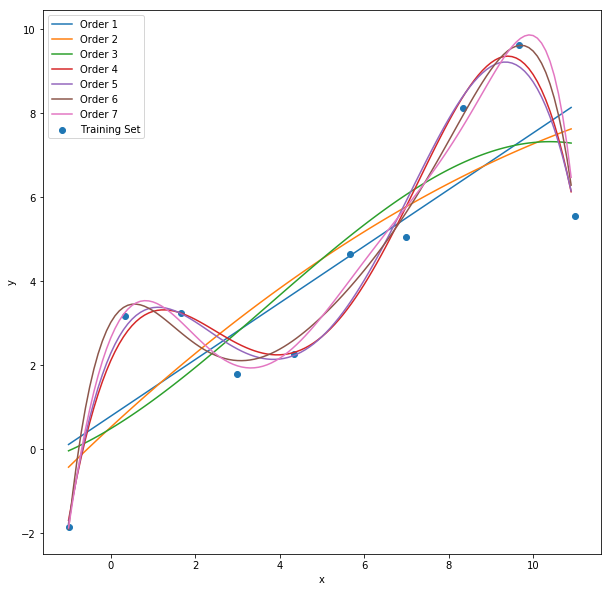

In [9]:
plt.clf()
plt.figure(figsize=(10,10))
plt.ylabel("y")
plt.xlabel("x")
plt.scatter(trainSet['x'], trainSet['y'],label="Training Set")


X = np.arange(trainSet['x'].min(), trainSet['x'].max(), .1)
for i,t in enumerate(theta):
    Y = [h(x, t) for x in X]
    plt.plot(X,Y, label="Order {}".format(i + 1))
    
plt.legend()
    
    

### e) Plot the evolution of the costs Jtrain(θ) and Jcv(θ) as a function of the order O.

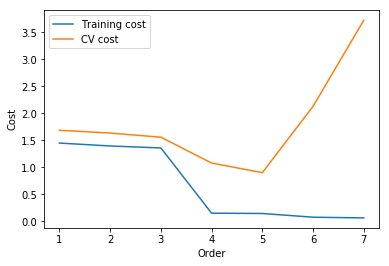

In [10]:
Ytrain = [J(trainSet, t) for t in theta]
YCV = [J(CVSet, t) for t in theta]

xRange = range(1,len(theta)+1)
plt.clf()
plt.xlabel("Order")
plt.ylabel("Cost")
plt.plot(xRange, Ytrain, label="Training cost")
plt.plot(xRange, YCV, label="CV cost")
plt.legend()

### f) What is your best model according to these costs ?

According to the last plot, we have the minimum cost of the Cross Validation Set (thus the best model) when **theta = 5**. After that point, we observe that the models suffer from overfitting